# CV FINAL PROJECT
### Student Information
Arpit Tiwari: 23PGAI0127

Satyam Verma: 23PGAI0065 

Lakshya Soni: 23PGAI00117

Minal Sheth: 23PGAI0079

Ronak Bhatt: 23PGAI0031

Avinash Gupta: 23PGAI0085

Pushkar Pushp: 23PGAI0061


In [146]:
pip install pytesseract pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\Ronak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [147]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import io
from PIL import Image
from IPython.display import display, Image

In [148]:
import cv2
from PIL import Image

def Student_id_identifier(imagepath):
        # Load the template and the image
        template_of_logo = cv2.imread('Template_logo.jpg')
        template_of_id = cv2.imread('Id_verification_template.jpg')
        image = cv2.imread(imagepath)

        # Get the width and height of the template
        template_height , template_width, _ = template_of_logo.shape
        template_height_id , template_width_id, _ = template_of_id.shape

        # Perform template matching using normalized correlation coefficient

        result = cv2.matchTemplate(image, template_of_logo, cv2.TM_CCORR_NORMED)
        result_id = cv2.matchTemplate(image, template_of_id, cv2.TM_CCORR_NORMED)

        # Get the location of the template
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        min_val_id, max_val_id, min_loc_id, max_loc_id = cv2.minMaxLoc(result_id)
        
        # Check if the maximum correlation coefficient is above a threshold
        if max_val > 0.9:

            # Draw a rectangle around the template on the image
            top_left = max_loc
            bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
            cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

            # Map other boxes based on the location of the template
            Detected_boxes = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
            institute_logo = Image.open(imagepath).crop((top_left[0] , top_left[1] + 50, top_left[0] + 400, top_left[1] + 200))
            candidate_photo = Image.open(imagepath).crop((top_left[0] , top_left[1] + 350, top_left[0] + 450, top_left[1] + 800))
            student_name = Image.open(imagepath).crop((top_left[0] , top_left[1] + 850, top_left[0] + 400, top_left[1] + 1050))

            print('Detected_boxes: ')
            print('Green Box is the detected logo.')
            img = Image.fromarray(Detected_boxes, 'RGB')
            display(img)
            print('institute_logo: ')
            display(institute_logo)
            print('We have detected a logo in the image.')
            print('Now let\'s do next level of verification!!!')
            
            # Check if the maximum correlation coefficient is above a threshold

            if max_val_id > 0.98:
                # top_left_id = max_loc_id
                # bottom_right_id = (top_left_id[0] + template_width_id, top_left_id[1] + template_height_id)
                student_id = Image.open(imagepath).crop((top_left[0]-130 , top_left[1] + 1050, top_left[0] + 600, top_left[1] + 1200))
            

                # Display the result
                
                cv2.imshow('Result', image)
                cv2.waitKey(0)
                cv2.destroyAllWindows()

                # ID card is information
                
                print('candidate_photo: ')
                display(candidate_photo)
                print('student_name: ')
                display(student_name)
                print('student_id: ')
                display(student_id)
                print('Hence, the student is verified. The ID card is valid and the student information is mentioned above.')
            else:
                print('Logo has been found but ID card is not Found. Please try again.')

        else:
            # If the template does not match, print a message indicating invalid ID card
            print('Invalid ID card: Neither template of logo is found nor ID card template found. Please try again.')
   


## Let's check the above function for various input images such as id card, Institute logo and random image

### 1. Check For Jio Instute Id Card 

Detected_boxes: 
Green Box is the detected logo.


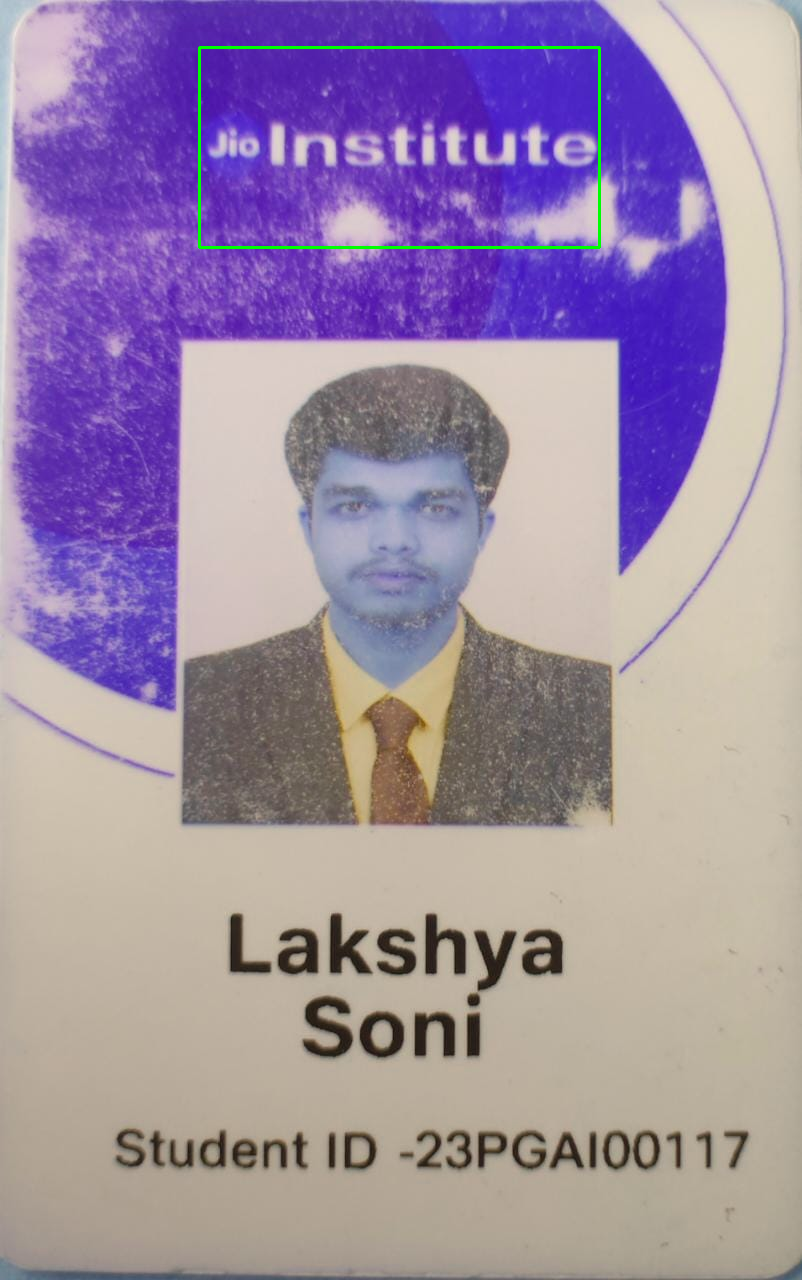

institute_logo: 


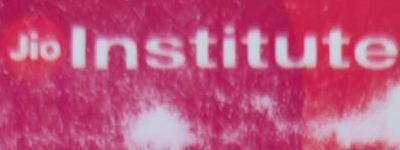

We have detected a logo in the image.
Now let's do next level of verification!!!
candidate_photo: 


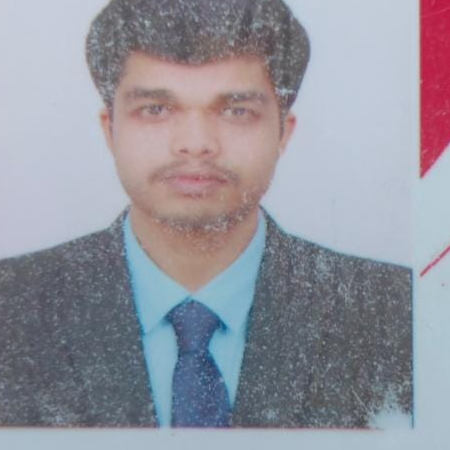

student_name: 


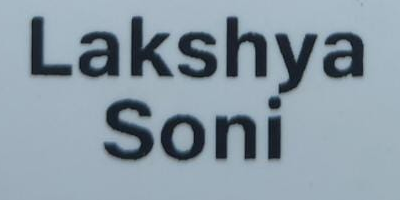

student_id: 


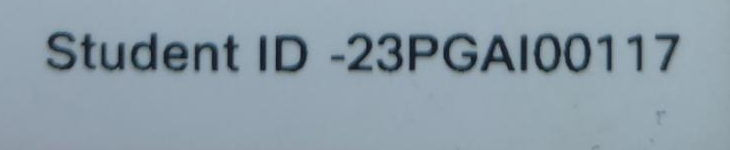

Hence, the student is verified. The ID card is valid and the student information is mentioned above.


In [149]:
Student_id_identifier('Lakshya.jpg')

Detected_boxes: 
Green Box is the detected logo.


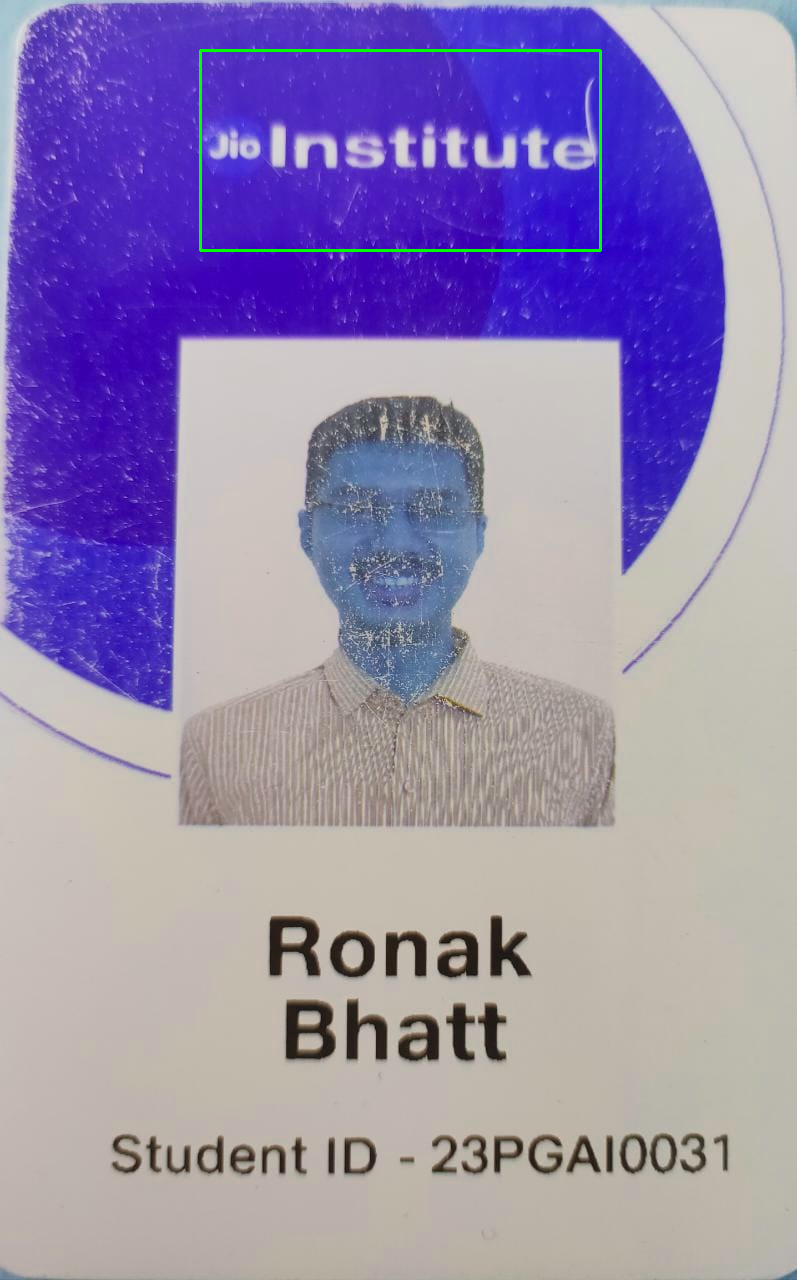

institute_logo: 


We have detected a logo in the image.
Now let's do next level of verification!!!
candidate_photo: 


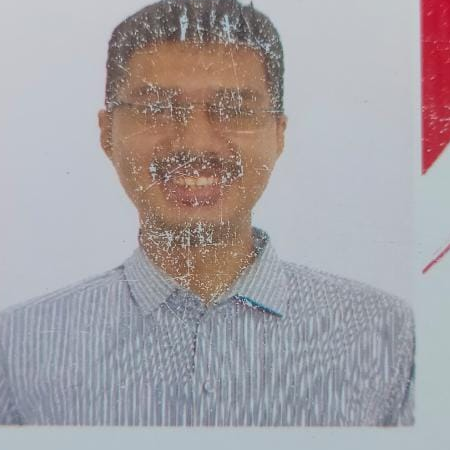

student_name: 


student_id: 


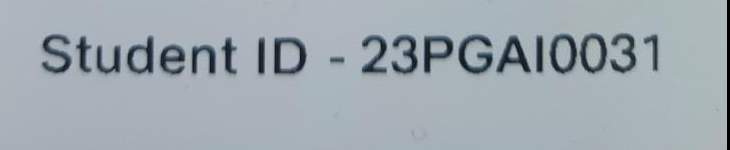

Hence, the student is verified. The ID card is valid and the student information is mentioned above.


In [150]:
Student_id_identifier('Ronak.jpg')

Detected_boxes: 
Green Box is the detected logo.


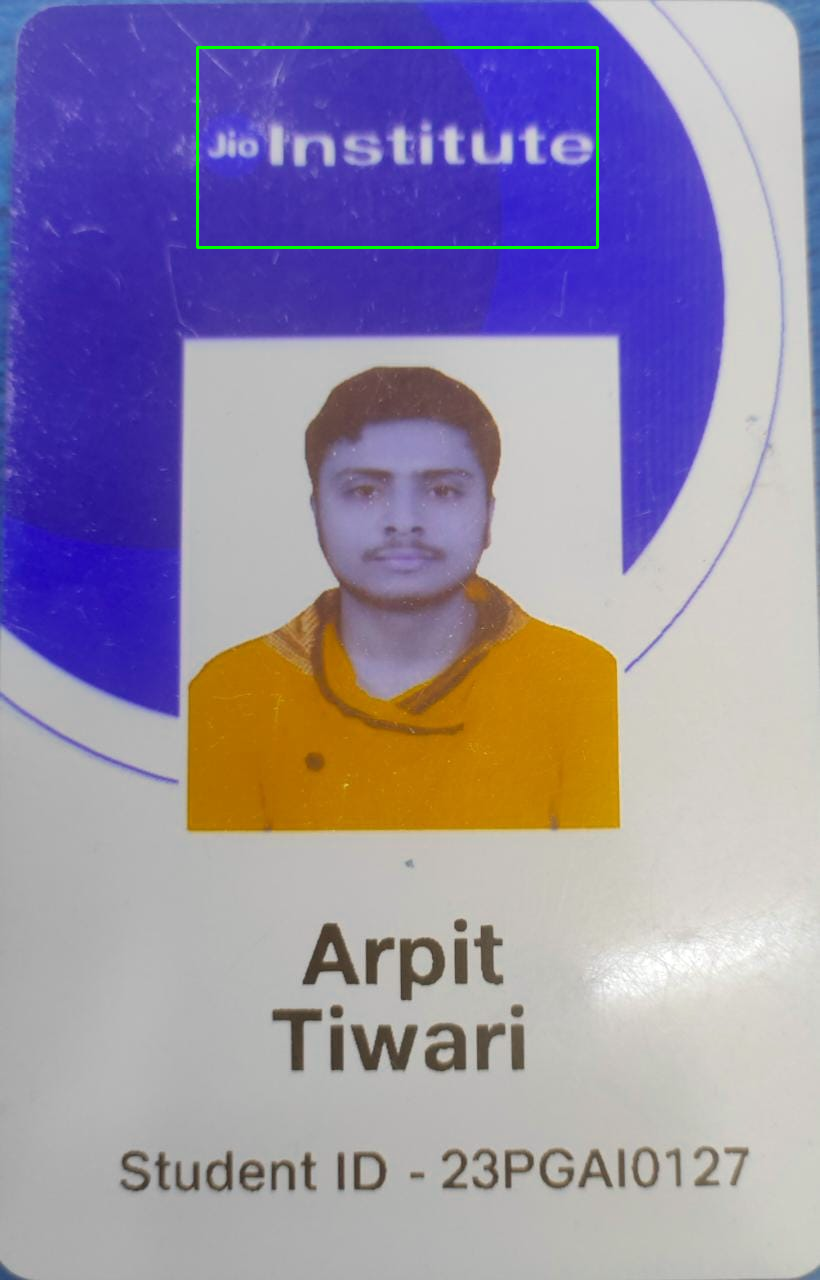

institute_logo: 


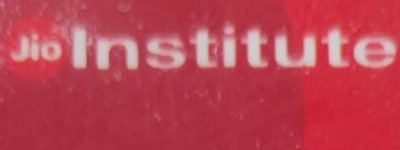

We have detected a logo in the image.
Now let's do next level of verification!!!
candidate_photo: 


student_name: 


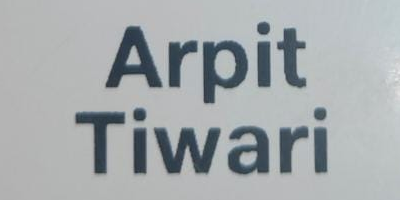

student_id: 


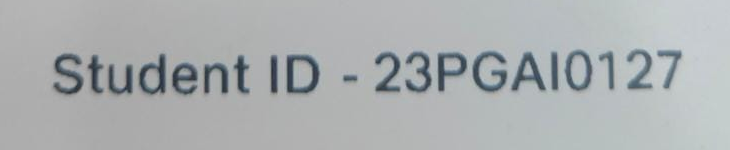

Hence, the student is verified. The ID card is valid and the student information is mentioned above.


In [151]:
Student_id_identifier('Arpit.jpg')

### 2. Check if Jio Instiute Logo is present in image but it's not ID Card


Detected_boxes: 
Green Box is the detected logo.


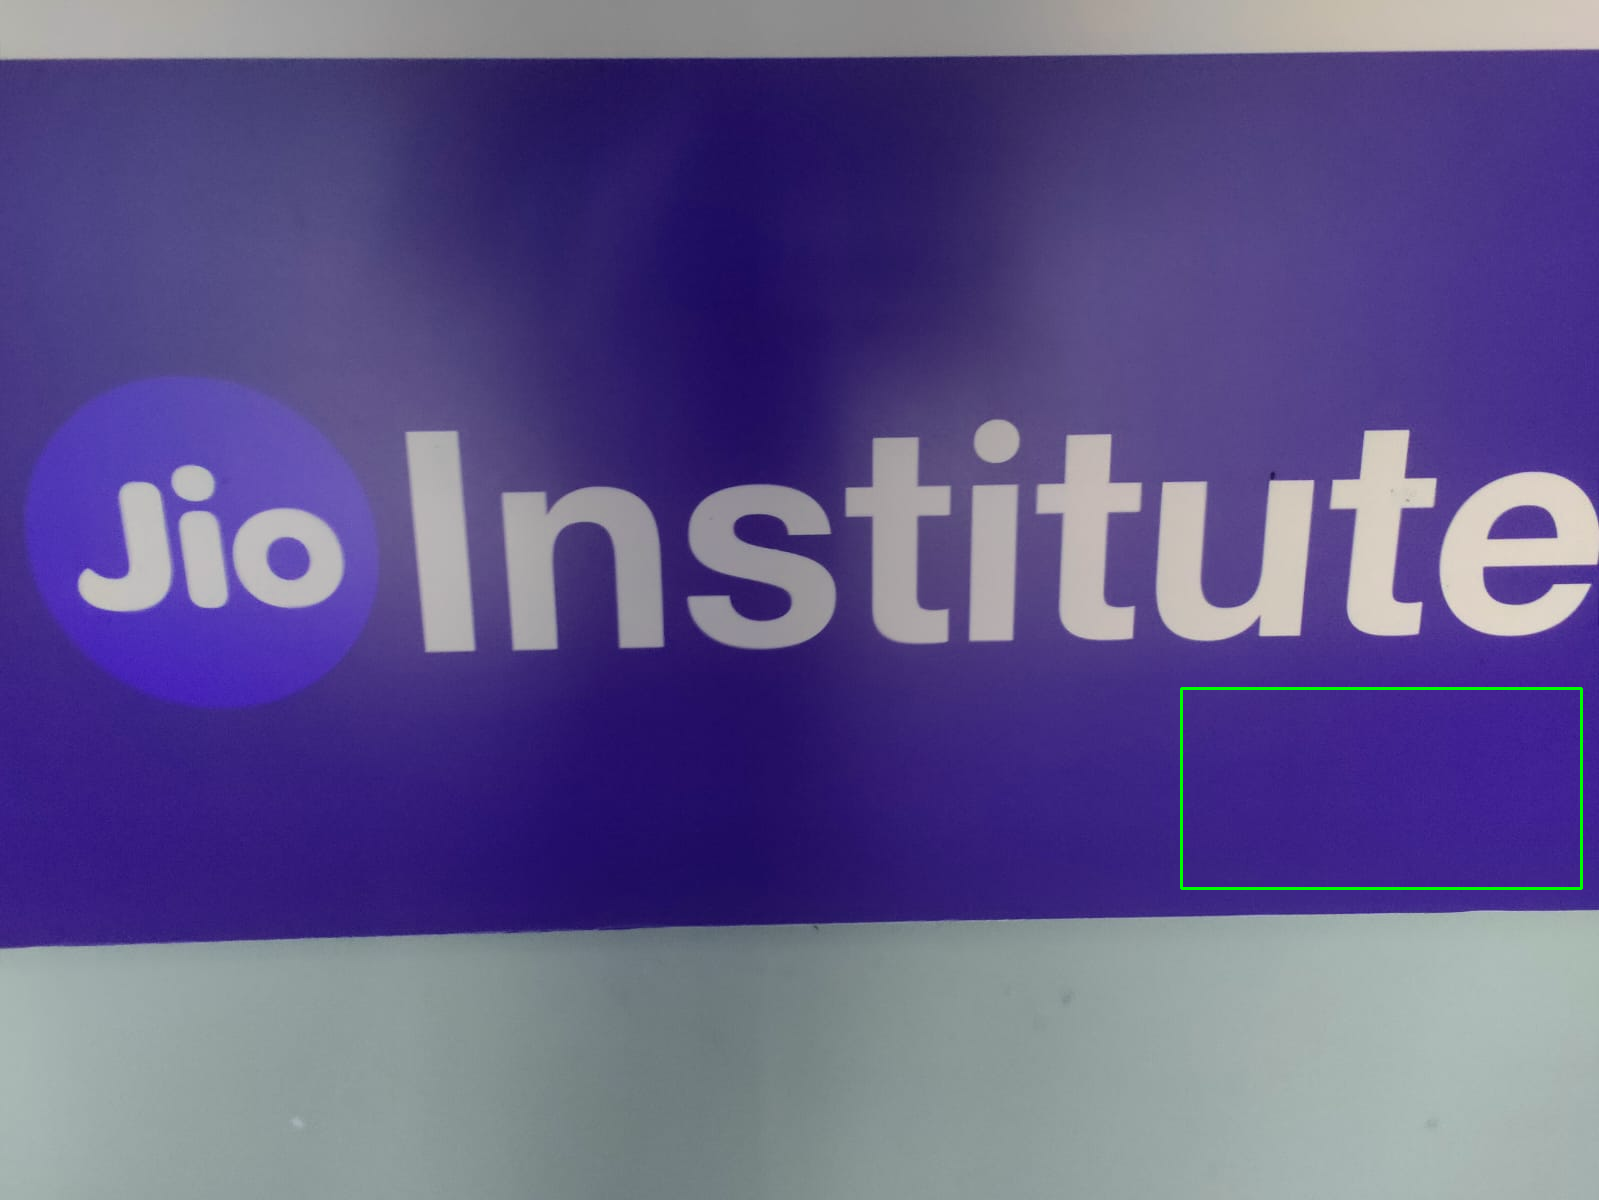

institute_logo: 


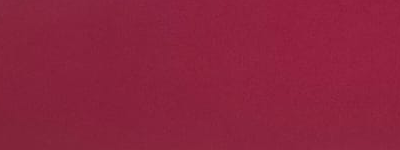

We have detected a logo in the image.
Now let's do next level of verification!!!
Logo has been found but ID card is not Found. Please try again.


In [152]:
Student_id_identifier('TestPass.jpg')

Detected_boxes: 
Green Box is the detected logo.


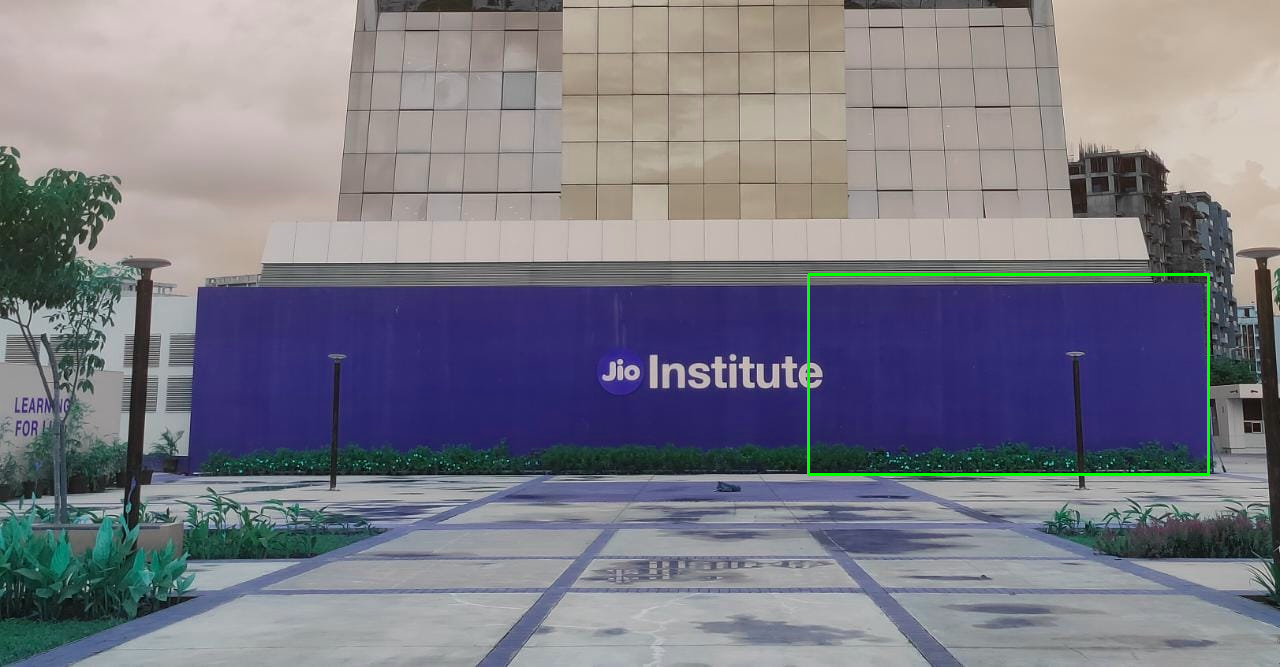

institute_logo: 


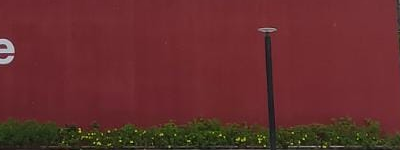

We have detected a logo in the image.
Now let's do next level of verification!!!
Logo has been found but ID card is not Found. Please try again.


In [153]:
Student_id_identifier('TestPass1.jpg')

##### We can see that the it can identify the Jio Institute logo is present in the image but it's not giving proper bounding box for logo. It might be because our template was aimed to identify the id card logo, still it is capable of identifying that the logo is present in the image!!

### 3. Check if No Jio Instiute Logo or Jio Institute ID Card is present. It can be any other Random ID Card or any other random image!!!

In [154]:
Student_id_identifier('TestFail.jpg')

Invalid ID card: Neither template of logo is found nor ID card template found. Please try again.


In [155]:
Student_id_identifier('TestFail1.jpg')

Invalid ID card: Neither template of logo is found nor ID card template found. Please try again.


In [156]:
Student_id_identifier('TestFail2.jpg')

Invalid ID card: Neither template of logo is found nor ID card template found. Please try again.


##### So First image was Driving licence, other 2 images were random images for those it is showing invalid ID card.

###### We have done data collection part by our own. All above images and data were prepared by us! We tried it for other student's ID Card as well & it's working fine!! 

# --------------------THANK YOU---------------------